#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,\
                            classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#### Reading Data 

In [2]:
heros_info = pd.read_csv('data/heroes_information.csv')

In [3]:
heros_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [4]:
heros_info.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
## Drop unnamed:0 column

heros_info.drop(columns='Unnamed: 0',inplace=True)

In [6]:
heros_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [7]:
heros_info.shape

(734, 10)

In [8]:
heros_info.name.nunique()

715

In [9]:
## We have 715 unique heros info in the data

### Label Creation using Race Column
### Ignore all unknown races

In [10]:
heros_info['Race'].nunique()

## There are 62 unique races in the data

62

In [11]:
heros_info['Race'].value_counts(dropna=False)

-                     304
Human                 208
Mutant                 63
God / Eternal          14
Human / Radiation      11
Cyborg                 11
Android                 9
Symbiote                9
Alien                   7
Kryptonian              7
Demon                   6
Atlantean               5
Alpha                   5
Asgardian               5
Inhuman                 4
Cosmic Entity           4
Animal                  4
Human / Altered         3
New God                 3
Human / Cosmic          2
Vampire                 2
Eternal                 2
Saiyan                  2
Amazon                  2
Metahuman               2
Demi-God                2
Frost Giant             2
Human-Kree              2
Mutant / Clone          1
Parademon               1
                     ... 
Icthyo Sapien           1
Bizarro                 1
Planet                  1
Human-Vuldarian         1
Human-Vulcan            1
Korugaran               1
Clone                   1
Strontian   

#### Remove '-' (unknown race) from the data

In [12]:
heros_info = heros_info[heros_info['Race']!='-']

In [13]:
heros_info.shape

(430, 10)

#### create target variable with 1 when race is human else 0

In [14]:
heros_info['Target'] = np.where(heros_info['Race']=='Human',1,0)

In [15]:
heros_info['Target'].value_counts()

0    222
1    208
Name: Target, dtype: int64

#### Distribution of Human vs non human is 48 and 52% respectively

In [16]:
round(heros_info['Target'].value_counts(normalize=True)*100)

0    52.0
1    48.0
Name: Target, dtype: float64

### Checking Null Values(Publisher and Weight having null values)

In [17]:
heros_info.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     8
Skin color    0
Alignment     0
Weight        2
Target        0
dtype: int64

#### Publisher Variable Analysis

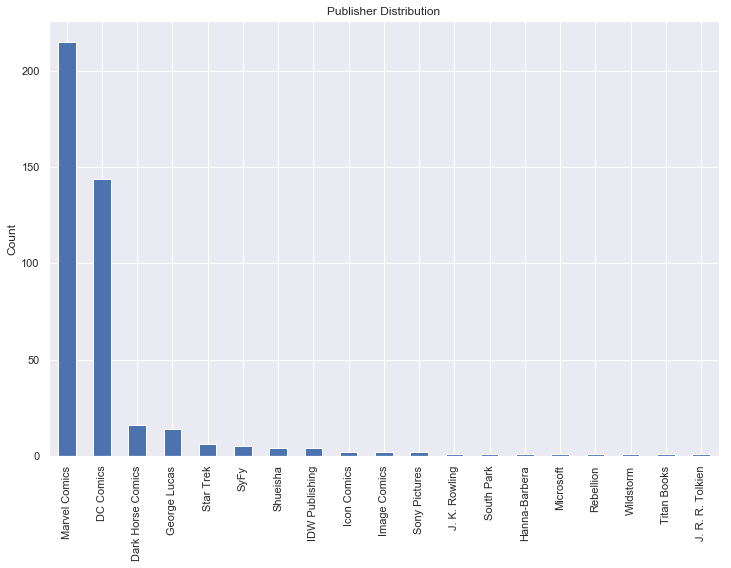

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
heros_info['Publisher'].value_counts().plot(kind='bar')
plt.title('Publisher Distribution')
plt.ylabel('Count')
plt.show()

In [19]:
## Impute missing publisher values with Marvel Comics as Marvel comics has maximum number of heros information

In [20]:
heros_info['Publisher'][heros_info['Publisher'].isnull()] = heros_info['Publisher'].mode()[0]

#### Weight Variable Analysis 

In [21]:
heros_info['Weight'].describe()

count    428.000000
mean      65.934579
std      131.180982
min      -99.000000
25%       18.000000
50%       76.500000
75%       99.000000
max      855.000000
Name: Weight, dtype: float64

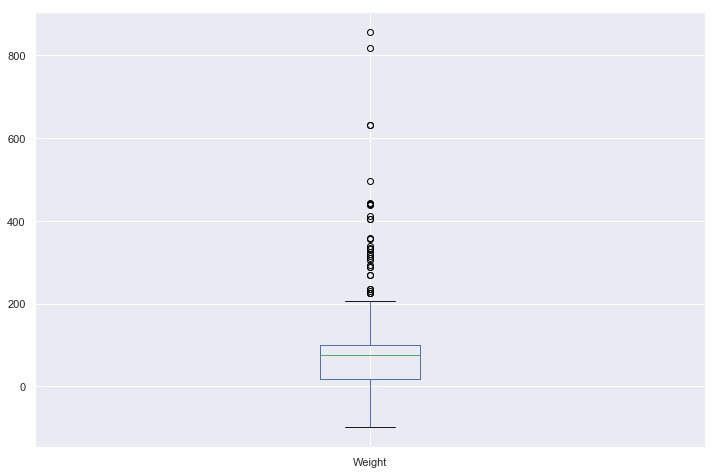

In [22]:
heros_info['Weight'].plot(kind='box');

#### There are values where weight is less than 0 

#### Impute weight value with median where weight is either null or less than 0

In [23]:
mask_weight = ((heros_info['Weight']<0) | (heros_info['Weight'].isnull()))

In [24]:
heros_info['Weight'][mask_weight] = heros_info['Weight'][~mask_weight].median()

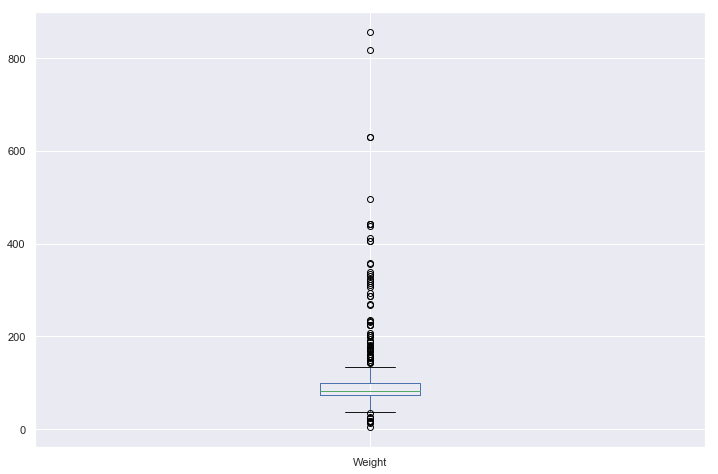

In [25]:
heros_info['Weight'].plot(kind='box');

#### Height Variable Analysis

In [26]:
heros_info['Height'].describe()

count    430.000000
mean     132.312791
std      131.611814
min      -99.000000
25%      163.500000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

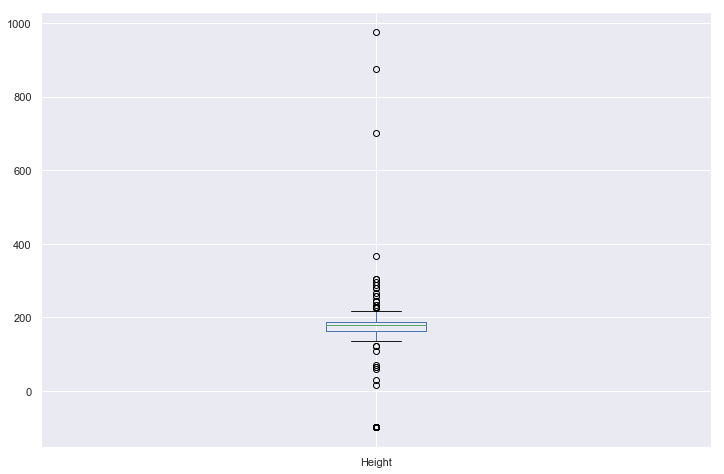

In [27]:
heros_info['Height'].plot(kind='box');

#### Replacing the height values with median where the values are less than 0 or null

In [28]:
mask_height = ((heros_info['Height']<0) | (heros_info['Height'].isnull()))

In [29]:
heros_info['Height'][mask_height] = heros_info['Height'][~mask_height].median()

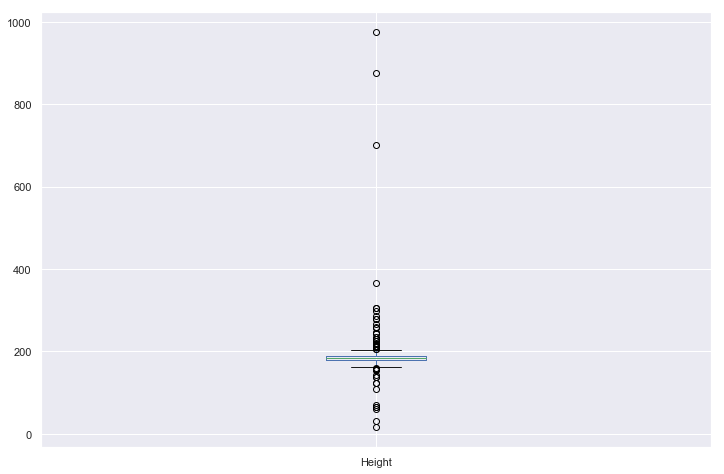

In [30]:
heros_info['Height'].plot(kind='box');

#### Average Weight of Non-Human is 123 and Height is 195 
#### Average Weight of Human is 94 and Height is 181 

In [31]:
heros_info.groupby('Target').agg({'Weight':'mean','Height':'mean'})

,Weight,Height
Target,,
0,123.139640,195.898649
1,94.293269,181.043269


#### Correlation of Weight and Height with Target Variable

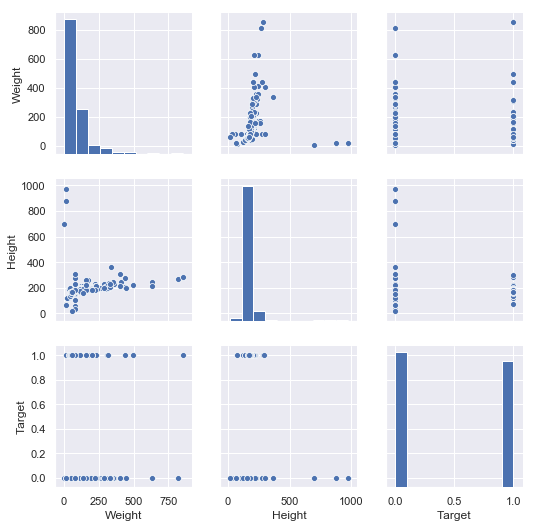

In [32]:
sns.pairplot(heros_info[['Weight','Height','Target']]);

### Gender Variable Analysis

In [33]:
heros_info['Gender'].value_counts()

Male      321
Female    102
-           7
Name: Gender, dtype: int64

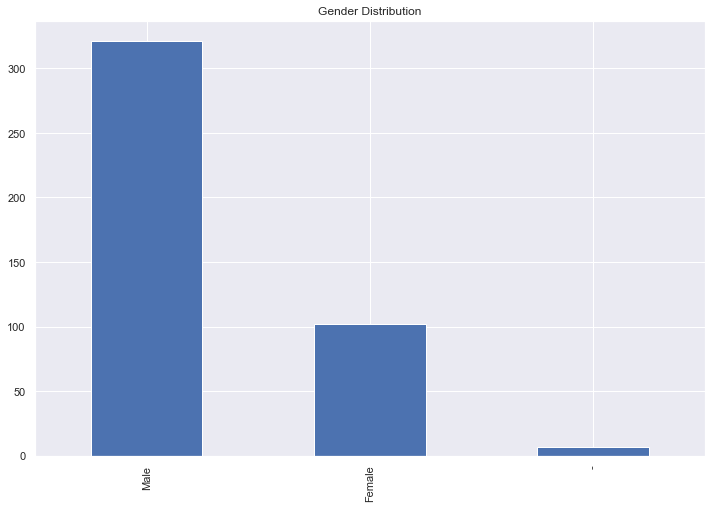

In [34]:
heros_info['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution');

#### Bivariate Analysis between Gender and Target Variable

In [35]:
heros_info.groupby('Gender').agg({'Target':'mean'})

,Target
Gender,
-,0.142857
Female,0.490196
Male,0.489097


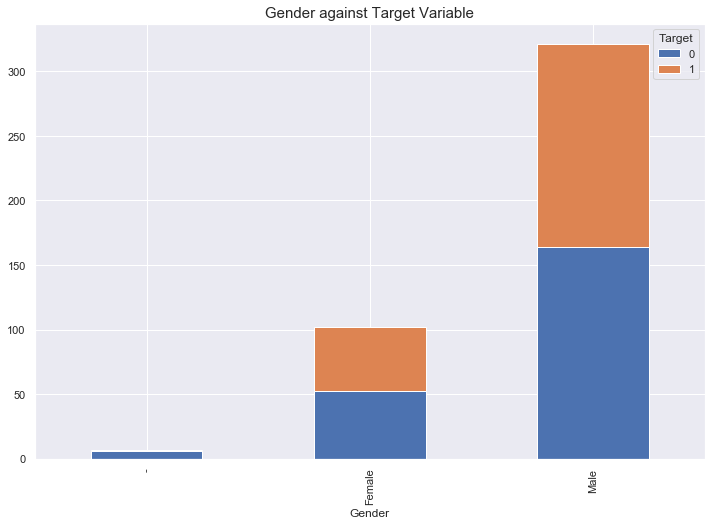

In [36]:
pd.crosstab(heros_info['Gender'],heros_info['Target']).plot(kind='bar',stacked=True)
plt.title('Gender against Target Variable',fontsize=15);

In [37]:
heros_info.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight', 'Target'],
      dtype='object')

### Eye Color Variable Analysis

In [38]:
heros_info['Eye color'].value_counts()

blue                       147
brown                       75
-                           65
green                       51
red                         31
yellow                      16
black                       12
white                       10
hazel                        5
grey                         4
gold                         2
amber                        2
purple                       2
violet                       1
yellow / red                 1
green / blue                 1
indigo                       1
yellow (without irises)      1
silver                       1
blue / white                 1
bown                         1
Name: Eye color, dtype: int64

In [39]:
heros_info['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'white', 'black',
       'silver', 'yellow / red', 'grey', 'purple', 'gold', 'blue / white',
       'hazel', 'green / blue', 'yellow (without irises)', 'indigo',
       'amber', 'bown', 'violet'], dtype=object)

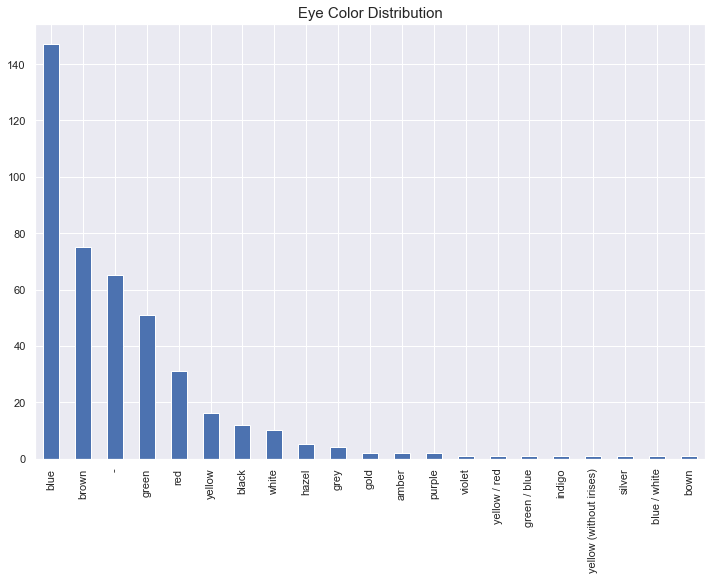

In [40]:
heros_info['Eye color'].value_counts().plot(kind='bar')
plt.title("Eye Color Distribution", fontsize=15);

In [41]:
heros_info.groupby('Eye color')['Target'].agg({'mean','count'}).sort_values('count',ascending=False)

,count,mean
Eye color,,
blue,147,0.551020
brown,75,0.640000
-,65,0.461538
green,51,0.588235
red,31,0.096774
yellow,16,0.187500
black,12,0.083333
white,10,0.000000
hazel,5,0.800000


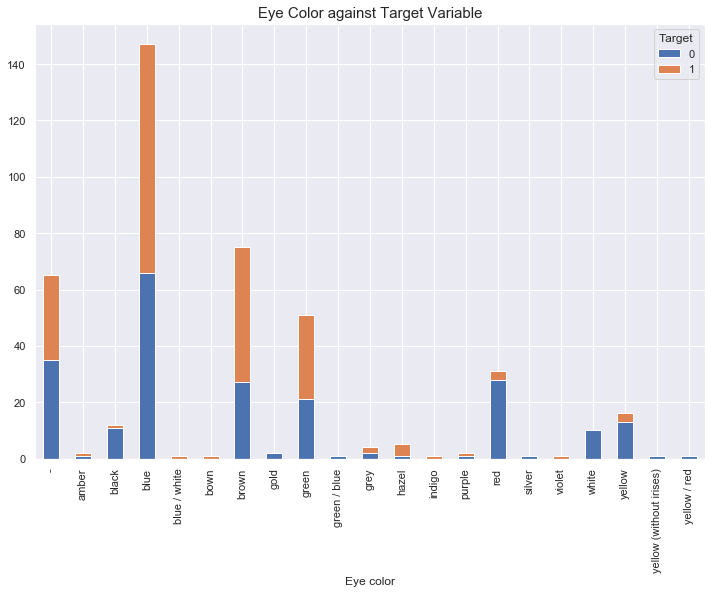

In [42]:
pd.crosstab(heros_info['Eye color'],heros_info['Target']).plot(kind='bar',stacked=True);
plt.title("Eye Color against Target Variable", fontsize=15);

In [43]:
heros_info['Hair color'].value_counts()

Black               106
-                    67
Blond                60
Brown                57
No Hair              53
Red                  27
White                15
Auburn                9
Green                 7
Purple                4
Strawberry Blond      4
Silver                3
blond                 3
Grey                  3
Brown / White         3
Blue                  2
black                 2
Red / Orange          1
Magenta               1
Brownn                1
Orange                1
Black / Blue          1
Name: Hair color, dtype: int64

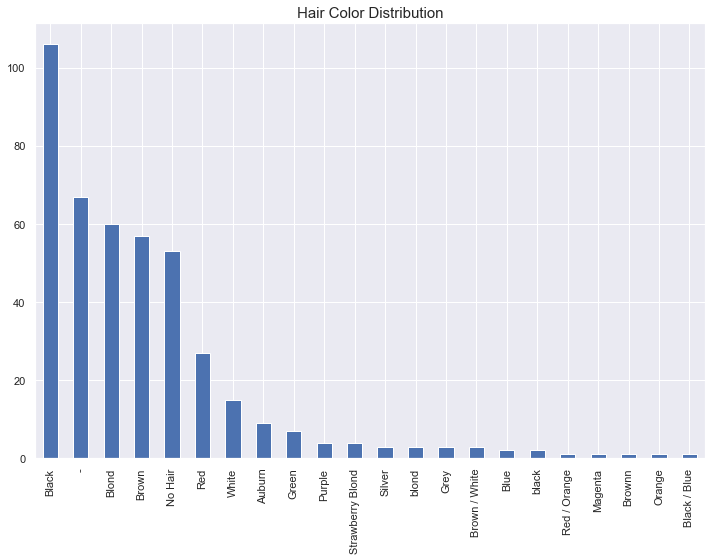

In [44]:
heros_info['Hair color'].value_counts().plot(kind='bar');
plt.title("Hair Color Distribution", fontsize=15);

In [45]:
heros_info.groupby('Hair color')['Target'].agg({'mean','count'}).sort_values('count',ascending=False)

,count,mean
Hair color,,
Black,106,0.518868
-,67,0.402985
Blond,60,0.616667
Brown,57,0.666667
No Hair,53,0.226415
Red,27,0.555556
White,15,0.133333
Auburn,9,0.888889
Green,7,0.428571


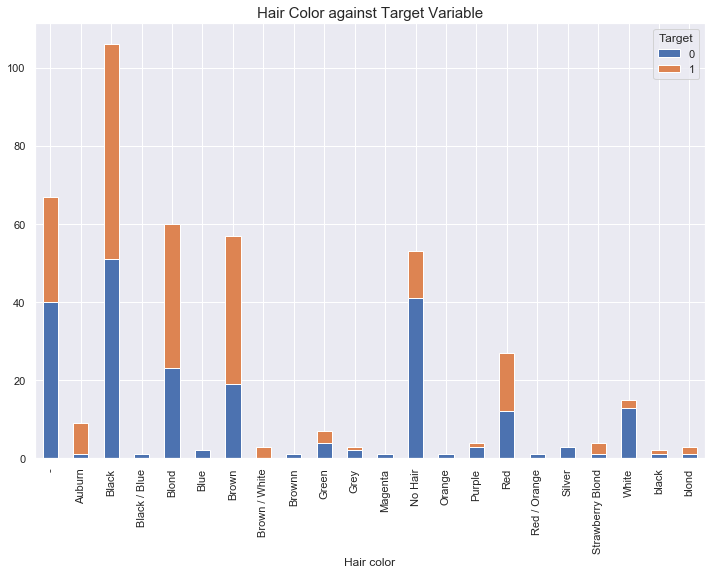

In [46]:
pd.crosstab(heros_info['Hair color'],heros_info['Target']).plot(kind='bar',stacked=True)
plt.title("Hair Color against Target Variable", fontsize=15);

In [47]:
heros_info['Skin color'].value_counts()

-                 360
green              20
blue                9
red                 8
white               7
silver              5
grey                5
purple              3
gold                3
pink                2
yellow              2
black               1
orange / white      1
red / black         1
orange              1
gray                1
blue-white          1
Name: Skin color, dtype: int64

In [48]:
heros_info['Skin color'].value_counts(normalize=True)

-                 0.837209
green             0.046512
blue              0.020930
red               0.018605
white             0.016279
silver            0.011628
grey              0.011628
purple            0.006977
gold              0.006977
pink              0.004651
yellow            0.004651
black             0.002326
orange / white    0.002326
red / black       0.002326
orange            0.002326
gray              0.002326
blue-white        0.002326
Name: Skin color, dtype: float64

#### Skin Color Variable has 84% null values 

In [49]:
heros_info['Alignment'].value_counts()

good       279
bad        120
neutral     24
-            7
Name: Alignment, dtype: int64

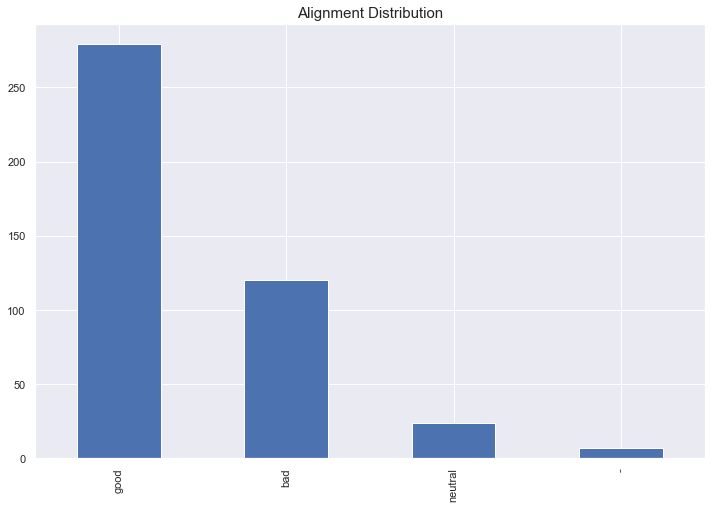

In [50]:
heros_info['Alignment'].value_counts().plot(kind='bar');
plt.title("Alignment Distribution",fontsize=15);

In [51]:
heros_info.groupby('Alignment').agg({'Target':'mean'})

,Target
Alignment,
-,0.142857
bad,0.416667
good,0.530466
neutral,0.375000


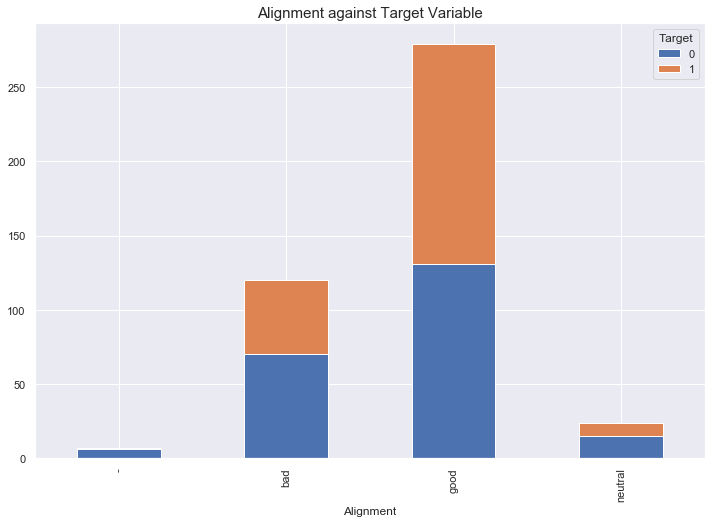

In [52]:
pd.crosstab(heros_info['Alignment'],heros_info['Target']).plot(kind='bar',stacked=True);
plt.title("Alignment against Target Variable", fontsize=15);

In [53]:
super_hero_powers = pd.read_csv('data/super_hero_powers.csv')

In [54]:
super_hero_powers.shape

(667, 168)

In [55]:
super_hero_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
super_hero_powers.sum(axis=1).shape

(667,)

In [57]:
super_hero_powers['Num_of_powers'] = super_hero_powers.sum(axis=1)

In [58]:
heros_with_maxpowers = super_hero_powers[['hero_names','Num_of_powers']].sort_values('Num_of_powers',ascending=False).head(10)

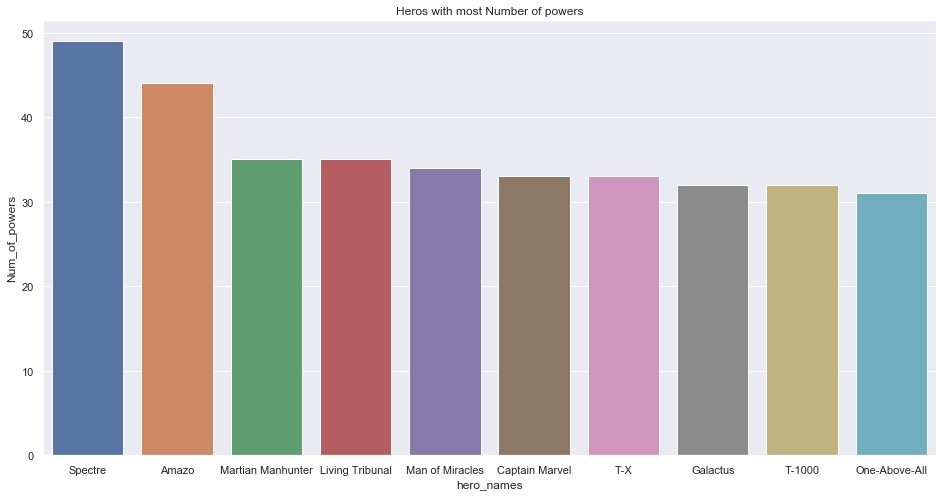

In [59]:
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(heros_with_maxpowers['hero_names'],heros_with_maxpowers['Num_of_powers']).set_title("Heros with most Number of powers");

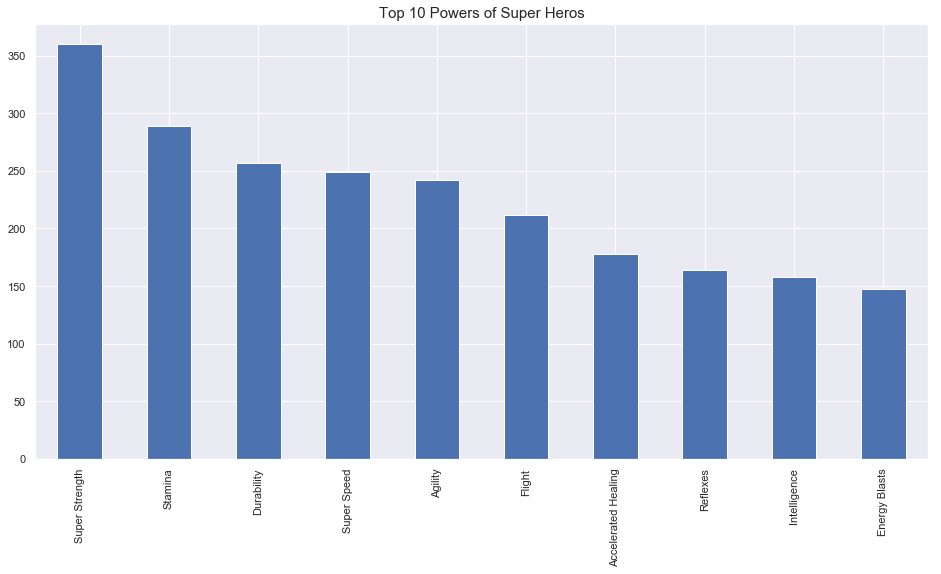

In [60]:
super_hero_powers.drop(columns = ['hero_names','Num_of_powers']).sum(axis=0).\
                                        sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Powers of Super Heros",fontsize=15);

#### Replace True and False with 1 and 0 

In [61]:
super_hero_powers.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Num_of_powers
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,7


In [62]:
super_hero_powers.replace({False:0,True:1},inplace=True)

In [63]:
super_hero_powers.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Num_of_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7


### Creating Dummy variables for Heros_info data frame

#### Categorical Columns

In [64]:
cat_columns = ['Gender', 'Eye color','Hair color','Publisher', 'Alignment']

In [65]:
heros_info_with_dummy= pd.get_dummies(heros_info,columns=cat_columns)

In [66]:
heros_info_with_dummy.shape

(430, 75)

In [67]:
heros_info_with_dummy.columns

Index(['name', 'Race', 'Height', 'Skin color', 'Weight', 'Target', 'Gender_-',
       'Gender_Female', 'Gender_Male', 'Eye color_-', 'Eye color_amber',
       'Eye color_black', 'Eye color_blue', 'Eye color_blue / white',
       'Eye color_bown', 'Eye color_brown', 'Eye color_gold',
       'Eye color_green', 'Eye color_green / blue', 'Eye color_grey',
       'Eye color_hazel', 'Eye color_indigo', 'Eye color_purple',
       'Eye color_red', 'Eye color_silver', 'Eye color_violet',
       'Eye color_white', 'Eye color_yellow',
       'Eye color_yellow (without irises)', 'Eye color_yellow / red',
       'Hair color_-', 'Hair color_Auburn', 'Hair color_Black',
       'Hair color_Black / Blue', 'Hair color_Blond', 'Hair color_Blue',
       'Hair color_Brown', 'Hair color_Brown / White', 'Hair color_Brownn',
       'Hair color_Green', 'Hair color_Grey', 'Hair color_Magenta',
       'Hair color_No Hair', 'Hair color_Orange', 'Hair color_Purple',
       'Hair color_Red', 'Hair color_Red / Orang

In [68]:
heros_info_with_powers = heros_info_with_dummy.merge(super_hero_powers,left_on='name',right_on='hero_names')

In [69]:
heros_info_with_powers.shape

(413, 244)

In [70]:
heros_info_with_powers.columns

Index(['name', 'Race', 'Height', 'Skin color', 'Weight', 'Target', 'Gender_-',
       'Gender_Female', 'Gender_Male', 'Eye color_-',
       ...
       'Reality Warping', 'Odin Force', 'Symbiote Costume', 'Speed Force',
       'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo',
       'Omnipresent', 'Omniscient', 'Num_of_powers'],
      dtype='object', length=244)

### Model Buliding 

#### Split the data in to training and test data

In [71]:
## Remove these columns as we dont use in the model building 
## name,Race,Skin color,hero_names

In [72]:
final_data = heros_info_with_powers.drop(columns=['name','Race','Skin color','hero_names','Num_of_powers'])

In [73]:
final_data.head(2)

,Height,Weight,Target,Gender_-,Gender_Female,Gender_Male,Eye color_-,Eye color_amber,Eye color_black,Eye color_blue,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,203.0,441.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,191.0,65.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
target = final_data['Target']
features = final_data.iloc[:,final_data.columns!='Target']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target,random_state=32)

### Logistic Regression Model

In [76]:
lr = LogisticRegression()

In [77]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
lr.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [79]:
confusion_matrix(y_train,lr.predict(X_train))

array([[149,  14],
       [ 14, 132]])

In [80]:
confusion_matrix(y_test,lr.predict(X_test))

array([[44, 11],
       [12, 37]])

In [81]:
accuracy_score(y_train,lr.predict(X_train))

0.9093851132686084

In [82]:
accuracy_score(y_test,lr.predict(X_test))

0.7788461538461539

In [83]:
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       163
           1       0.90      0.90      0.90       146

   micro avg       0.91      0.91      0.91       309
   macro avg       0.91      0.91      0.91       309
weighted avg       0.91      0.91      0.91       309



In [84]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        55
           1       0.77      0.76      0.76        49

   micro avg       0.78      0.78      0.78       104
   macro avg       0.78      0.78      0.78       104
weighted avg       0.78      0.78      0.78       104



In [85]:
def plot_ROC_with_AUC(y_train, train_pred, y_test, test_pred):
    plt.figure(figsize=(6,4))
    fpr, tpr, thresholds = roc_curve(y_train,np.array(train_pred))
    auc = roc_auc_score(y_train,np.array(train_pred))
    plt.plot(fpr, tpr,lw = 2, color = "red", label='Train ROC (area = %0.2f)' % auc)
    plt.legend(loc='best')

    fpr, tpr, thresholds = roc_curve(y_test,np.array(test_pred))
    auc = roc_auc_score(y_test,np.array(test_pred))
    plt.plot(fpr, tpr,lw = 2, color = "blue", label='Train ROC (area = %0.2f)' % auc)
    plt.legend(loc='best')

    plt.title("ROC Curve",fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.show()

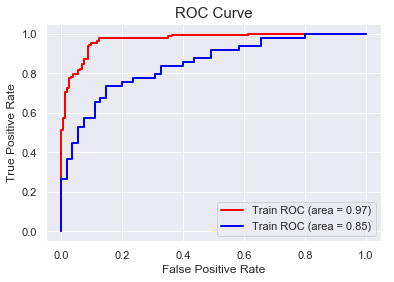

In [86]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]
plot_ROC_with_AUC(y_train,train_pred,y_test,test_pred)

### Random Forest

In [87]:
rf = RandomForestClassifier(max_depth=3,n_estimators=15,max_features=15, random_state=32)

In [88]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [89]:
print(classification_report(y_train,rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       163
           1       0.76      0.65      0.70       146

   micro avg       0.74      0.74      0.74       309
   macro avg       0.74      0.73      0.73       309
weighted avg       0.74      0.74      0.74       309



In [90]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        55
           1       0.83      0.59      0.69        49

   micro avg       0.75      0.75      0.75       104
   macro avg       0.77      0.74      0.74       104
weighted avg       0.77      0.75      0.74       104



In [91]:
accuracy_score(y_test,rf.predict(X_test))

0.75

In [92]:
accuracy_score(y_train,rf.predict(X_train))

0.7378640776699029

In [93]:
y_train.value_counts(1)

0    0.527508
1    0.472492
Name: Target, dtype: float64

In [94]:
y_test.value_counts(1)

0    0.528846
1    0.471154
Name: Target, dtype: float64

In [95]:
df = pd.DataFrame(X_train.columns,rf.feature_importances_).reset_index()

In [96]:
df.columns = ['FeatureImportance','Feature']

In [97]:
df.sort_values(by='FeatureImportance',ascending=False).head(10)

,FeatureImportance,Feature
88,0.119244,Super Strength
119,0.081935,Peak Human Condition
90,0.075849,Telepathy
156,0.037918,Natural Armor
27,0.037226,Hair color_Auburn
1,0.033126,Weight
72,0.032703,Accelerated Healing
121,0.028423,Camouflage
0,0.025350,Height
167,0.025121,Regeneration


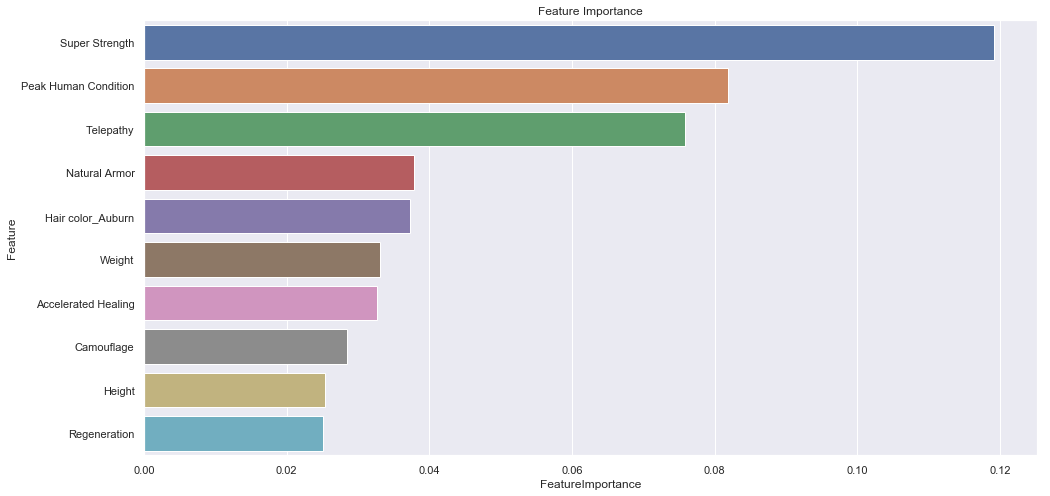

In [98]:
top_10_features = df.sort_values(by='FeatureImportance',ascending=False).head(10)
sns.barplot(x = top_10_features['FeatureImportance'],y = top_10_features['Feature']).set_title("Feature Importance");

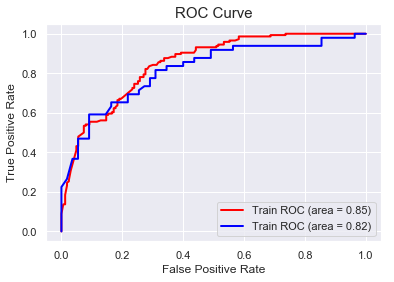

In [99]:
train_pred = rf.predict_proba(X_train)[:,1]
test_pred = rf.predict_proba(X_test)[:,1]
plot_ROC_with_AUC(y_train,train_pred,y_test,test_pred)